# Neural Network

In [68]:
class SimpleClass():
    
    def __init__(self, name):
        print('hello'+name)
        
    def yell(self):
        print('YELLING')

In [65]:
x = SimpleClass()

hello


In [59]:
x.yell()

YELLING


In [69]:
class ExtendedClass(SimpleClass):
    
    def __init__(self):
        
        super().__init__('Paula')
        print("Extend!")

In [70]:
y =ExtendedClass()

helloPaula
Extend!


In [72]:
y.yell()

YELLING


# Operation

In [217]:
import numpy as np

In [194]:
class Operation():
    
    def __init__(self, input_nodes=[]):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)    
            
    def compute(self):
        pass

In [195]:
class add(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]        
        return x_var + y_var

In [196]:
class multiply(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]        
        return x_var * y_var

In [197]:
# funcao de ativacao
class matmul(Operation):
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]        
        return x_var.dot(y_var)

In [198]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [199]:
class Variable():
    
    def __init__(self, initial_value=None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [200]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

In [201]:
g = Graph()

In [202]:
g.set_as_default()

In [203]:
A = Variable(10)

In [204]:
b = Variable(1)

In [205]:
x = Placeholder()

In [206]:
y = multiply(A, x)

In [207]:
z = add(y, b)

In [208]:
def traverse_postorder(operation):
    
    '''
    PostOrder Traversal of Nodes. Basically makes sure computations are done in the correct order
    (Ax first, then Ax + b). Feel free to copy and paste this
    It is not super important for understanding the basic fundamentals of deep learning
    '''
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)        
        
    recurse(operation)    
    return nodes_postorder

In [209]:
class Session():
    
    def run(self, operation, feed_dict={}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else:
                
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                
                node.output = np.array(node.output)
                
        return operation.output        

In [210]:
sess = Session()


In [211]:
result = sess.run(operation=z, feed_dict={x:10})

In [212]:
result

101

In [213]:
sess.run(operation=z, feed_dict={x:10})

101

In [214]:
g = Graph()

g.set_as_default()

A = Variable([[10, 20], [30, 40]])

b = Variable([1, 2,])

x = Placeholder()

y = matmul(A, x)

z = add(y, b)

In [215]:
sess = Session()

In [218]:
sess.run(operation=z, feed_dict={x:10})

array([[101, 202],
       [301, 402]])

# Classification

## Activation Function

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

In [220]:
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

In [222]:
sample_z = np.linspace(-10, 10, 100)

sample_a = sigmoid(sample_z)

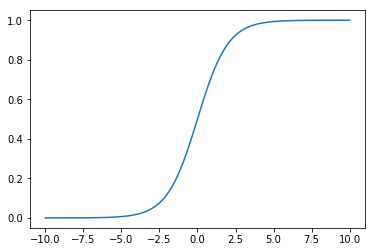

In [223]:
plt.plot(sample_z, sample_a)

In [253]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        
        super().__init__([z])
        
    def compute(self, z_val):
        
        return 1 / (1 + np.exp(-z_val))
    

In [254]:
from sklearn.datasets import make_blobs

In [255]:
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=75)

In [256]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [257]:
type(data)

tuple

In [258]:
data[1]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1])

In [259]:
features = data[0]

In [260]:
labels = data[1]

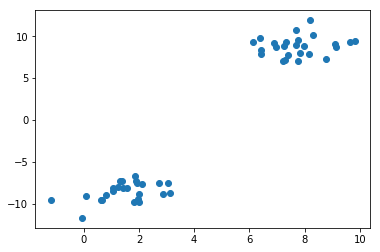

In [261]:
plt.scatter(features[:,0], features[:,1])

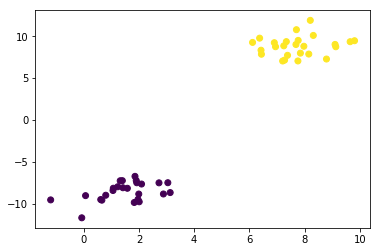

In [262]:
plt.scatter(features[:,0], features[:,1], c=labels)

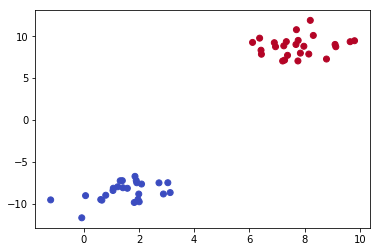

In [263]:
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')

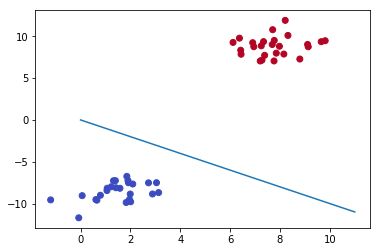

In [264]:
x = np.linspace(0, 11, 10)
y = -x
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')
plt.plot(x,y)

# (1, 1) * f - 5 = 0

In [265]:
np.array([1,1]).dot(np.array([[8], [10]])) -5

array([13])

In [266]:
np.array([1,1]).dot(np.array([[2], [-10]])) -5

array([-13])

In [267]:
g = Graph()

In [268]:
g.set_as_default()

In [269]:
x = Placeholder()

In [270]:
w = Variable([1,1])

In [271]:
b = Variable(-5)

In [272]:
z = add(matmul(w, x),b)

In [273]:
a = Sigmoid(z) # result in between 0 and 1

In [274]:
sess = Session()

In [275]:
sess.run(operation=a, feed_dict={x:[8, 10]})


0.99999773967570205

In [276]:
sess.run(operation=a, feed_dict={x:[2, -10]})

2.2603242979035746e-06